Now, Let's use SimpleRNN model on the IMDB movie-Review-Classification problem .First, pre-process the data

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_feature = 10000  # Number of words to consider as features
maxlen = 500         # Cut-off texts after this many words (among the max_features most common words)
batch_size = 32
print('Loading Data...')

(input_train , y_train) , (input_test , y_test) = imdb.load_data(num_words= max_feature)
print(len(input_train) , 'Train sequences')
print(len(input_test) , 'Test Sequences')
print('Pad Sequences (samples x time)')
input_train = sequence.pad_sequences(input_train , maxlen= maxlen)
input_test = sequence.pad_sequences(input_test , maxlen= maxlen)
print('Input train shape: ',input_train.shape)
print('Input test shape: ',input_test.shape)

Loading Data...
25000 Train sequences
25000 Test Sequences
Pad Sequences (samples x time)
Input train shape:  (25000, 500)
Input test shape:  (25000, 500)


let's train a simple recurrent network using an **"Embedding"** layer and a **"SimpleRNN"** layer

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding , Dense , SimpleRNN

model = Sequential()
model.add(Embedding(max_feature , 32))
model.add(SimpleRNN(32))
model.add(Dense(1 , activation='sigmoid'))


Let's train a simple recurrent network using **LSTM**

In [4]:
model.compile(optimizer='rmsprop' , loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train , y_train , epochs=10,
                    batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 46s 294ms/step - loss: 0.5752 - acc: 0.6933 - val_loss: 0.4027 - val_acc: 0.8300
Epoch 2/10
157/157 [==============================] - 53s 335ms/step - loss: 0.3493 - acc: 0.8604 - val_loss: 0.3720 - val_acc: 0.8388
Epoch 3/10
157/157 [==============================] - 51s 322ms/step - loss: 0.2812 - acc: 0.8902 - val_loss: 0.3601 - val_acc: 0.8430
Epoch 4/10
157/157 [==============================] - 45s 288ms/step - loss: 0.2319 - acc: 0.9115 - val_loss: 0.3445 - val_acc: 0.8720
Epoch 5/10
157/157 [==============================] - 53s 335ms/step - loss: 0.1868 - acc: 0.9312 - val_loss: 0.3776 - val_acc: 0.8656
Epoch 6/10
157/157 [==============================] - 51s 323ms/step - loss: 0.1419 - acc: 0.9485 - val_loss: 0.3565 - val_acc: 0.8666
Epoch 7/10
157/157 [==============================] - 43s 277ms/step - loss: 0.1063 - acc: 0.9633 - val_loss: 0.4948 - val_acc: 0.7922
Epoch 8/10
157/157 [==============================] - 4

**Ploting Results:-**

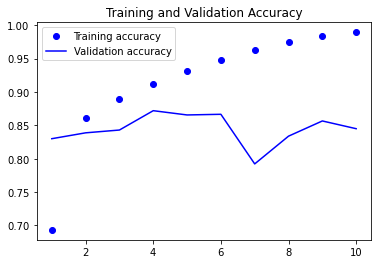

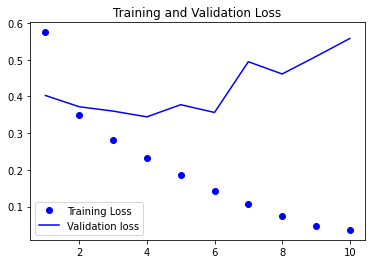

In [5]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs , acc , 'bo' , label = 'Training accuracy')
plt.plot(epochs , val_acc , 'b', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs , loss , 'bo' , label = 'Training Loss')
plt.plot(epochs , val_loss , 'b' , label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

model = Sequential()
model.add(Embedding(max_feature , 32))
model.add(LSTM(32))
model.add(Dense(1 ,  activation= 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics= ['acc'])
history = model.fit(input_train , y_train,
            epochs= 10,
            batch_size= 128,
            validation_split= 0.2)

Epoch 1/10
157/157 [==============================] - 129s 820ms/step - loss: 0.3756 - acc: 0.8426 - val_loss: 0.3507 - val_acc: 0.8512
Epoch 2/10
157/157 [==============================] - 111s 707ms/step - loss: 0.2620 - acc: 0.8997 - val_loss: 0.3177 - val_acc: 0.8694
Epoch 3/10
157/157 [==============================] - 117s 745ms/step - loss: 0.2175 - acc: 0.9187 - val_loss: 0.2836 - val_acc: 0.8826
Epoch 4/10
157/157 [==============================] - 95s 604ms/step - loss: 0.1871 - acc: 0.9330 - val_loss: 0.3442 - val_acc: 0.8822
Epoch 5/10
157/157 [==============================] - 91s 582ms/step - loss: 0.1675 - acc: 0.9398 - val_loss: 0.3620 - val_acc: 0.8324
Epoch 6/10
157/157 [==============================] - 90s 572ms/step - loss: 0.1589 - acc: 0.9432 - val_loss: 0.6581 - val_acc: 0.7890
Epoch 7/10
157/157 [==============================] - 101s 643ms/step - loss: 0.1391 - acc: 0.9517 - val_loss: 0.3582 - val_acc: 0.8874
Epoch 8/10
157/157 [==============================]

In [5]:
# plotting the Results

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs , acc , 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label= 'Training Loss')
plt.plot(epochs, val_loss, 'b', label= 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

TypeError: 'History' object is not subscriptable